In [1]:
#import necessary libraries
import pandas as pd
import nltk
import sys # needed this for certain print options during debugging
import numpy as np #lmao why did we not have this before
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/soumyankar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#load the dataset
pd.set_option('display.max_colwidth', None)
data = pd.read_csv('final_dataset.csv')
data.head(2)

,review_id,title,tags,year,user_review,user_suggestion,url
0,1,Spooky's Jump Scare Mansion,"['Action', 'Adventure', 'Free to Play', 'Indie']",2016.0,"I'm scared and hearing creepy voices. So I'll pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times. This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood (but more bubble and 'clean'). Hello 1990's.What charactes there are (that isnot trying to kill me) were likable and a bit odd. I did do a few noob things though, such as:Oh look a class room full of ghosts from dead children, lets shine my flashlight on them and stand there staring at them..Or, hmm creepy music, I'll turn around and see if I can see what's chasing me.Never before in a game have I been this afraid of finding a locked door.",1,https://www.youtube.com/watch?v=48NzbFQebxg
1,2,Spooky's Jump Scare Mansion,"['Action', 'Adventure', 'Free to Play', 'Indie']",2016.0,"Best game, more better than Sam Pepper's YouTube account. 10/10What you'll need to play:A computerSome extra pants.Pros:Scary as hell.Fun.Adventure.Spooky.Did I forgot to mention that its scary as hell?You'll get more pants/briefs in your wardrobe.Time consuming if you're bored.Cons:Buying pants/briefs. You haven't downloaded it yet.",1,https://www.youtube.com/watch?v=48NzbFQebxg


In [3]:
#dataset facts
data.shape

(17494, 7)

In [4]:
#dataset facts
data['user_suggestion'].value_counts()

1    9968
0    7526
Name: user_suggestion, dtype: int64

In [5]:
#dataset facts
data['title'].nunique()

44

In [6]:
# Adding tags to the games here
data['title'].unique()

array(["Spooky's Jump Scare Mansion", 'Sakura Clicker', 'WARMODE',
       'Fractured Space', 'Dota 2', 'Path of Exile', 'War Thunder',
       'Ring of Elysium', 'Team Fortress 2', 'Yu-Gi-Oh! Duel Links',
       'SMITE®', 'Brawlhalla', 'World of Tanks Blitz',
       'DCS World Steam Edition', 'Heroes & Generals',
       'The Elder Scrolls®: Legends™', 'Trove', 'Neverwinter',
       'Realm Royale', 'PlanetSide 2', 'Realm of the Mad God', 'Elsword',
       'theHunter Classic', 'Eternal Card Game', 'Black Squad',
       'Freestyle 2: Street Basketball', 'Bless Online',
       'RaceRoom Racing Experience', 'Fallout Shelter',
       'Tactical Monsters Rumble Arena', 'Creativerse', 'Dreadnought',
       'Infestation: The New Z', 'Shop Heroes', 'Robocraft',
       'Business Tour - Board Game with Online Multiplayer',
       'Crusaders of the Lost Idols', 'AdventureQuest 3D',
       'Realm Grinder', 'World of Guns: Gun Disassembly',
       'Bloons TD Battles', 'Cuisine Royale', 'School of Drago

In [7]:
# Data processing for removing stop words, lemmatization and stemmming, and english-only.
# Importing all relevant libraries and functions here
import spacy #load spacy
from sklearn.pipeline import Pipeline # pipelining pre-processing
from spacy.lang.en import English
nlp = spacy.load("en_core_web_sm")
tokenizer = nlp.tokenizer

2023-02-04 14:37:56.655320: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
#tokenization
def create_tokenized_dataset(data):
    tokens_list = []

    for j in data['user_review']:
#         tokens_list.append(word_tokenize(j))
        spacy_tokens = [token.orth_ for token in tokenizer(j)]
        tokens_list.append(spacy_tokens)
    data['Tokens'] = tokens_list   
    return data

df = create_tokenized_dataset(data)
df.head(1)

,review_id,title,tags,year,user_review,user_suggestion,url,Tokens
0,1,Spooky's Jump Scare Mansion,"['Action', 'Adventure', 'Free to Play', 'Indie']",2016.0,"I'm scared and hearing creepy voices. So I'll pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times. This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood (but more bubble and 'clean'). Hello 1990's.What charactes there are (that isnot trying to kill me) were likable and a bit odd. I did do a few noob things though, such as:Oh look a class room full of ghosts from dead children, lets shine my flashlight on them and stand there staring at them..Or, hmm creepy music, I'll turn around and see if I can see what's chasing me.Never before in a game have I been this afraid of finding a locked door.",1,https://www.youtube.com/watch?v=48NzbFQebxg,"[I, 'm, scared, and, hearing, creepy, voices, ., , So, I, 'll, pause, for, a, moment, and, write, a, review, while, I, wait, for, my, heart, beat, to, return, to, atleast, somewhat, calmer, times, ., , This, game, is, adorable, and, creepy, like, my, happy, tree, friends, but, with, the, graphics, sceme, of, my, childhood, (, but, more, bubble, and, ', clean, ', ), ., , Hello, 1990's, ., What, charactes, there, are, (, that, isnot, trying, to, kill, me, ), were, likable, and, a, bit, odd, ., , I, did, do, a, few, noob, things, though, ,, such, as, ...]"


In [9]:
#define lemmatizer
lemmatizer = WordNetLemmatizer()

In [10]:
#define stopwords
stopWords = set(stopwords.words('english'))
custom_stop = ["'m", "'ll", "'s", "'re", "n't", "'ve"]
stop_words = set(list(stopWords) + custom_stop)

In [11]:
#define punctuation
custom_punc = ["``", "''", "--", "...","♥"]
punctuation = set(list(string.punctuation) + custom_punc)

In [12]:
# nltk for removing english words
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to
[nltk_data]     /Users/soumyankar/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [13]:
#data preprocessing: define functions

# created a function to deal with that pesky steam heart emoticon
# print(ord('♥'))
def remove_steam_heart(tokens):
    for token in tokens:
        if len(token) == 1:
            if(ord(token) == 9829): # 9829 is the unicode for the heart emoticon
                tokens.remove(token)
    return tokens

#lower case
def lower_case(tokens):
    tokens = [token.lower() for token in tokens]
    return tokens

#remove stopwords
def remove_stopwords(tokens):
#     tokens = [token for token in tokens if token not in stop_words]
# Using the spacy stop words set instead of the english stop words
    tokens = [token for token in tokens if token not in nlp.Defaults.stop_words]
    return tokens

#remove digits
def remove_digits(tokens):
    for token in tokens:
        if token.isdigit():
            tokens.remove(token)
    return tokens

#remove punctuation
def remove_punctuation(tokens):
    tokens = [token for token in tokens if token not in punctuation]
    return tokens

#lemmatization
def lemmatize_words(tokens):
    for token in range(len(tokens)):
        tokens[token] = lemmatizer.lemmatize(tokens[token])
    return tokens

# Using nltk to word corpus to remove non-english words
# this method seemed cheaper and easier than spacy? maybe lol
def remove_non_english(tokens):
    tokens = [token for token in tokens if token in words]
    return tokens

In [14]:
#data preprocessing function
def data_preprocess(tokens):
    new_tokens = lower_case(tokens)
    new_tokens = remove_steam_heart(new_tokens)
    new_tokens = remove_non_english(new_tokens)
    new_tokens = remove_stopwords(new_tokens)
    new_tokens = remove_digits(new_tokens)
    new_tokens = remove_punctuation(new_tokens)
    new_tokens = lemmatize_words(new_tokens)
    return new_tokens
    
list_of_process_tokens = []
for i in df['Tokens']:
    list_of_process_tokens.append(data_preprocess(i))

In [15]:
df['ProcessTokens'] = list_of_process_tokens    
df.sample(20)

,review_id,title,tags,year,user_review,user_suggestion,url,Tokens,ProcessTokens
7816,10826,Trove,"['Action', 'Adventure', 'Casual', 'Free to Play', 'Massively Multiplayer', 'RPG']",2016.0,"One of my favorite steam games to play as of right now. This game brings me back to when Lego Universe existed, and it has a very similar feeling to it. Lots of classes, fair play, some minor tweaking needed here and there, but overall, great game.",1,https://www.youtube.com/watch?v=ns1i_2SzeGE,"[One, of, my, favorite, steam, games, to, play, as, of, right, now, ., This, game, brings, me, back, to, when, Lego, Universe, existed, ,, and, it, has, a, very, similar, feeling, to, it, ., Lots, of, classes, ,, fair, play, ,, some, minor, tweaking, needed, here, and, there, ,, but, overall, ,, great, game, .]","[favorite, steam, play, right, game, universe, similar, feeling, lot, class, fair, play, minor, overall, great, game]"
1529,1530,Fractured Space,"['Action', 'Indie', 'Early Access']",2016.0,"Early Access ReviewI play this game infrequently, and I enjoy it very much whenever I do play it. This is one of the best free to play games I have ever played, and if you haven't played it yet, you need to.",1,https://www.youtube.com/watch?v=MgKVV4pZBWo,"[Early, Access, ReviewI, play, this, game, infrequently, ,, and, I, enjoy, it, very, much, whenever, I, do, play, it, ., This, is, one, of, the, best, free, to, play, games, I, have, ever, played, ,, and, if, you, have, n't, played, it, yet, ,, you, need, to, .]","[early, access, play, game, infrequently, enjoy, play, best, free, play, need]"
14970,22081,Robocraft,"['Action', 'Free to Play', 'Indie', 'Massively Multiplayer', 'RPG', 'Simulation']",2016.0,"Early Access ReviewThis used to be my favirote game. I was excited for the meta, and it was great at first then came update after update, screw up after screw up and I couldn\'t figure out anything. The level system, the blocks, the guns, everything fundamentally changed and it stripped away everything even remotely enjoyable about the game. This game has great potential, but the devs preetty much ran it into the ground for money. I would play this game, PAY for it if it brought back everything to the first stage of the meta, with plenty of customization, a good level system, good gamemodes, and room to grow. Long story short, the devs had something good, something great and ruined it. I\'m sorry to say that I would NOT reccomend this game.",0,https://www.youtube.com/watch?v=JGr1Em2Ip-c,"[Early, Access, ReviewThis, used, to, be, my, favirote, game, ., I, was, excited, for, the, meta, ,, and, it, was, great, at, first, then, came, update, after, update, ,, screw, up, after, screw, up, and, I, couldn\'t, figure, out, anything, ., The, level, system, ,, the, blocks, ,, the, guns, ,, everything, fundamentally, changed, and, it, stripped, away, everything, even, remotely, enjoyable, about, the, game, ., This, game, has, great, potential, ,, but, the, devs, preetty, much, ran, it, into, the, ground, for, money, ., I, would, play, this, game, ,, PAY, for, it, if, it, brought, back, everything, to, ...]","[early, access, game, excited, meta, great, came, update, update, screw, screw, figure, level, system, fundamentally, stripped, away, remotely, enjoyable, game, game, great, potential, ran, ground, money, play, game, pay, brought, stage, meta, plenty, good, level, system, good, room, grow, long, story, short, good, great, ruined, sorry, game]"
4165,5561,Yu-Gi-Oh! Duel Links,"['Free to Play', 'Strategy']",2018.0,"This game is very beginner friendly and easy to pick up. I had never played yugioh before and this game was my first experience playing it. You start off with a decent deck (it isn't the best but for learning purposes, its pretty good) with a well known monster of your choice, Blue-Eyes White Dragon or Dark Magician. The gacha mechanic for gettting new cards is great and guarentees rare cards if you're patient enough to use enough gems on it. There is 

In [16]:
#JUST FOR FUN :)
#most common words for each category (user_suggestion=1 OR user_suggestion=0)

def words_frequency(data, rating_col, token_col, rating_nr):
    all_rating_tokens = []
    tokens = list(data[data[rating_col] == rating_nr][token_col])
    for i in tokens:
        for j in i:
            all_rating_tokens.append(j)
                
    freq = nltk.FreqDist(all_rating_tokens)
    print(freq.most_common()[0:20])
    freq.plot(10, cumulative=False)
    return freq, all_rating_tokens

[('game', 28458), ('like', 7237), ('play', 6765), ('good', 4889), ('time', 4615), ('fun', 4397), ('early', 4005), ('access', 3939), ('free', 3795), ('nope', 3235), ('great', 3005), ('lot', 2629), ('people', 2616), ('new', 2556), ('want', 2130), ('need', 2113), ('better', 1960), ('best', 1903), ('way', 1868), ('try', 1643)]


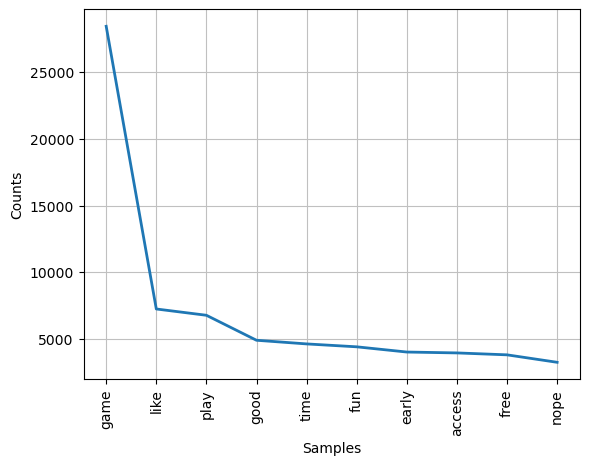

In [17]:
freq, all_rating_tokens = words_frequency(df, 'user_suggestion', 'ProcessTokens', 1)

[('game', 23714), ('play', 5105), ('like', 4795), ('time', 4427), ('good', 3012), ('access', 2963), ('early', 2915), ('money', 2892), ('fun', 2566), ('pay', 2379), ('new', 2264), ('want', 2099), ('people', 2095), ('way', 1685), ('free', 1644), ('bad', 1559), ('need', 1553), ('buy', 1530), ('better', 1513), ('lot', 1345)]


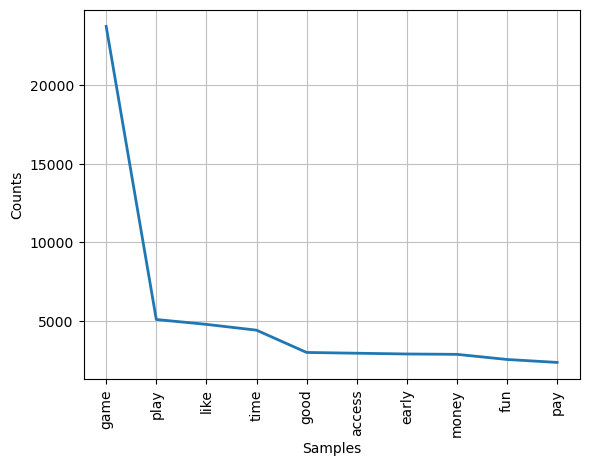

In [18]:
freq, all_rating_tokens = words_frequency(df, 'user_suggestion', 'ProcessTokens', 0)

In [19]:
#Converting the datatype of processtokens fromm list to string, so that our vectorization works right.
df['ProcessTokens'] = df['ProcessTokens'].astype("string")

In [20]:
# train test split before normalization
from sklearn.model_selection import train_test_split

X = df.drop(columns=['user_suggestion','review_id', 'year']).copy()
y = df['user_suggestion']

X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8)

X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(13995, 6)
(13995,)
(1749, 6)
(1749,)
(1750, 6)
(1750,)


(None, None)

In [21]:
#Check for NaN-Values
print(pd.isna(X_train).values)
print(pd.isna(y_train).values)

[[False False False False False False]
 [False False False False False False]
 [False False False False False False]
 ...
 [False False False False False False]
 [False False False False False False]
 [False False False False False False]]
[False False False ... False False False]


In [22]:
#define text vectorizers (I used two different ones, later we can decide which one we should continue with)
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

In [23]:
#text vectorization with count_vectorizer
#vectorization on train_dataset
np.set_printoptions(threshold=sys.maxsize)
def create_vectorized_dataset_count(data):
    list_of_count_vectors = []
    data = data.tolist() # converting to a list
    count_vector = count_vectorizer.fit_transform(data)
    count_array = count_vector.toarray()
#     Uncomment the two lines below to see the count vector with feature names
#     probably might also need to remove print truncation to see the whole thing.
    dftemp = pd.DataFrame(data=count_array,columns = count_vectorizer.get_feature_names())
    #return count_array # this is the 2d
    return count_vector

count_vector = create_vectorized_dataset_count(X_train['ProcessTokens']) # this becomes our count vectorization vector.
# we can use thhis to train our model.


/Users/soumyankar/.pyenv/versions/miniconda3-latest/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [24]:
#text vectorization with tfidf_vectorizer
#vectorization on train_dataset
def create_vectorized_dataset_tfidf(data):
    data = data.tolist()
    tfidf_vector = tfidf_vectorizer.fit_transform(data)
    tfidf_array = tfidf_vector.toarray()
    # prinnting non-zero colummns
    # dftemp = pd.DataFrame(data=tfidf_array, columns=tfidf_vectorizer.get_feature_names())
    # print(dftemp)
    #return tfidf_array
    return tfidf_vector

tfidf_vector = create_vectorized_dataset_tfidf(X_train['ProcessTokens'])

print(tfidf_vector.shape)
#df.head(1)

(13995, 12733)


NOTE: use either Count_Vector or TF-IDF_Vectors column as the input for ML models

Next steps: 
1. define different ML models to work with
2. split the dataset (either Count_Vector or TF-IDF_Vectors) into training and testing data
3. fit the training data to the models
4. make predictions

Further steps:

5. evaluate each model using different evaluation methods (use the testing dataset for this)

In [25]:
#transform count test data

test_count_vector = count_vectorizer.transform(X_test['ProcessTokens'])
print("n_samples: %d, n_features: %d" % test_count_vector.shape)

n_samples: 1750, n_features: 12733


In [26]:
#transform tfidf test data

test_tfidf_vector = tfidf_vectorizer.transform(X_test['ProcessTokens'])
print("n_samples: %d, n_features: %d" % test_tfidf_vector.shape)

n_samples: 1750, n_features: 12733


In [27]:
#Naive Bayes with count vector

from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(count_vector, y_train)

y_prediction = naive_bayes_classifier.predict(test_count_vector)

print("Multinomial Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_prediction)*100)

Multinomial Naive Bayes model accuracy(in %): 82.57142857142857


In [28]:
# Knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn_clf = knn.fit(count_vector, y_train)
knn_y_pred = knn_clf.predict(test_count_vector)


print("kNN model accuracy(in %):", metrics.accuracy_score(y_test, knn_y_pred)*100)


kNN model accuracy(in %): 62.228571428571435


In [29]:
# lr
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(count_vector, y_train)
lr_y_pred = lr_clf.predict(test_count_vector)


print("LR model accuracy(in %):", metrics.accuracy_score(y_test, lr_y_pred)*100)

LR model accuracy(in %): 82.17142857142858


/Users/soumyankar/.pyenv/versions/miniconda3-latest/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lr_y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, lr_y_pred))

Accuracy :  0.8217142857142857


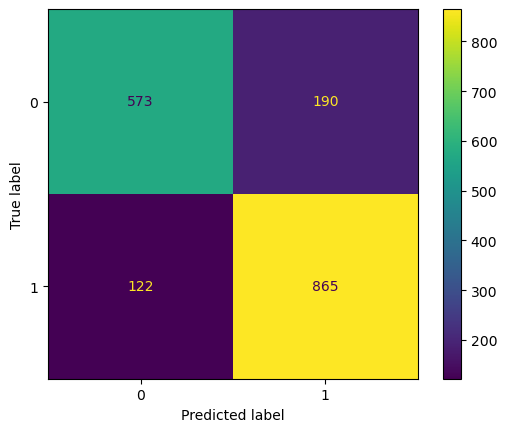

In [31]:
# printing confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr_clf.classes_)
disp.plot()
plt.show()